In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from numpy import sqrt
from statsmodels.tsa.api import ExponentialSmoothing
from pmdarima.arima import ARIMA
from pmdarima.arima import auto_arima
from sklearn.metrics import mean_squared_error as mse



In [30]:
train_1 = pd.read_csv("./food Analytics vidhya/train.csv")
train_1.head()

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders
0,1379560,1,55,1885,136.83,152.29,0,0,177
1,1466964,1,55,1993,136.83,135.83,0,0,270
2,1346989,1,55,2539,134.86,135.86,0,0,189
3,1338232,1,55,2139,339.50,437.53,0,0,54
4,1448490,1,55,2631,243.50,242.50,0,0,40


In [31]:
df_1902 = train_1[train_1['meal_id']==1902]
num_1109 = df_1902.groupby('week')['num_orders'].sum()
y = num_1109

In [32]:
y_train, y_test = y.iloc[:-8],y.iloc[-8:]
y_train.shape, y_test.shape

((137,), (8,))

In [33]:
model = auto_arima(y_train, trace=True, error_action='ignore' , suppress_warnings=True, seasonal=True, m=4)


Performing stepwise search to minimize aic
 ARIMA(2,0,2)(1,0,1)[4] intercept   : AIC=inf, Time=0.65 sec
 ARIMA(0,0,0)(0,0,0)[4] intercept   : AIC=1994.372, Time=0.01 sec
 ARIMA(1,0,0)(1,0,0)[4] intercept   : AIC=1951.147, Time=0.15 sec
 ARIMA(0,0,1)(0,0,1)[4] intercept   : AIC=1962.072, Time=0.15 sec
 ARIMA(0,0,0)(0,0,0)[4]             : AIC=2387.377, Time=0.01 sec
 ARIMA(1,0,0)(0,0,0)[4] intercept   : AIC=1950.498, Time=0.02 sec
 ARIMA(1,0,0)(0,0,1)[4] intercept   : AIC=1951.616, Time=0.09 sec
 ARIMA(1,0,0)(1,0,1)[4] intercept   : AIC=1952.558, Time=0.21 sec
 ARIMA(2,0,0)(0,0,0)[4] intercept   : AIC=1951.399, Time=0.08 sec
 ARIMA(1,0,1)(0,0,0)[4] intercept   : AIC=1951.655, Time=0.08 sec
 ARIMA(0,0,1)(0,0,0)[4] intercept   : AIC=1960.118, Time=0.08 sec
 ARIMA(2,0,1)(0,0,0)[4] intercept   : AIC=1953.107, Time=0.12 sec
 ARIMA(1,0,0)(0,0,0)[4]             : AIC=1972.532, Time=0.02 sec

Best model:  ARIMA(1,0,0)(0,0,0)[4] intercept
Total fit time: 1.681 seconds


c:\Users\dbda.STUDENTSDC\AppData\Local\anaconda3\envs\dung\lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\dbda.STUDENTSDC\AppData\Local\anaconda3\envs\dung\lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


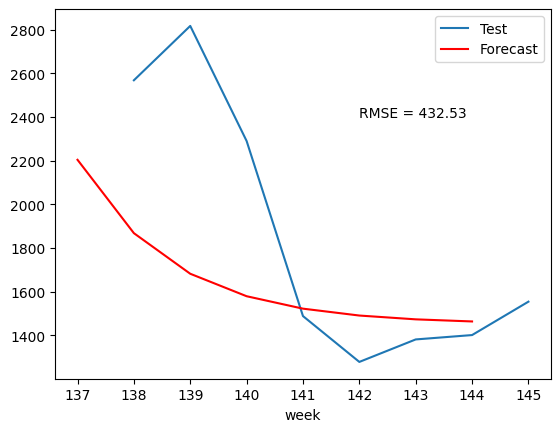

In [34]:
forecast = model.predict(n_periods=len(y_test))

y_test.plot(label ='Test')
forecast.plot(color='red', label='Forecast')
rmse = sqrt(mse(y_test, forecast))
plt.text(142,2400,"RMSE = "+ str(np.round(rmse,2)))
plt.legend(loc='best')
plt.show()

In [35]:
model = auto_arima(y_train, trace=True, error_action='ignore' , suppress_warnings=True)
forecast = model.predict(n_periods=len(y_test))

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=1953.139, Time=0.34 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=1994.372, Time=0.01 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=1950.498, Time=0.02 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=1960.118, Time=0.06 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=2387.377, Time=0.01 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=1951.399, Time=0.09 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=1951.655, Time=0.13 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=1953.107, Time=0.15 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=1972.532, Time=0.02 sec

Best model:  ARIMA(1,0,0)(0,0,0)[0] intercept
Total fit time: 0.830 seconds


c:\Users\dbda.STUDENTSDC\AppData\Local\anaconda3\envs\dung\lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\dbda.STUDENTSDC\AppData\Local\anaconda3\envs\dung\lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


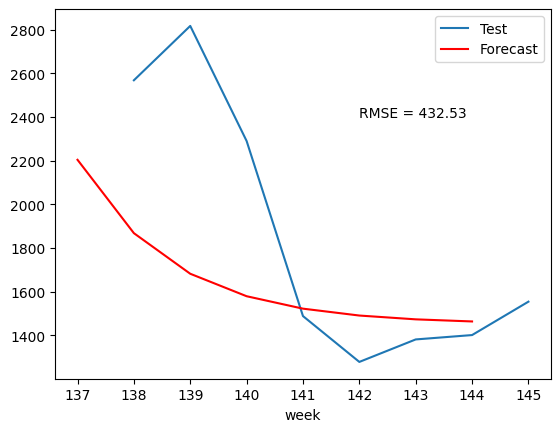

In [36]:
y_test.plot(label ='Test')
forecast.plot(color='red', label='Forecast')
rmse = sqrt(mse(y_test, forecast))
plt.text(142,2400,"RMSE = "+ str(np.round(rmse,2)))
plt.legend(loc='best')
plt.show()